# Question 3 Part 2

## Description

Read Babon and Cameraman and apply them gaussian and salt-and-pepper noise then transform the image with log and finally try to reduce the noise by applying the mean and median and gaussian filter to the noisy images the transform reverse log

## Import required dependencies

- Import cv2 for read and map the color channels
- Import numpy to work with arrays
- Import matplotlib to show image for each step
- Import skimage to use random_noise for applying noise to images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## Read Images

Read Babon and Cameraman Image and map the color from bgr to rgb, because imread read image in bgr order 

Text(0.5, 1.0, 'Babon')

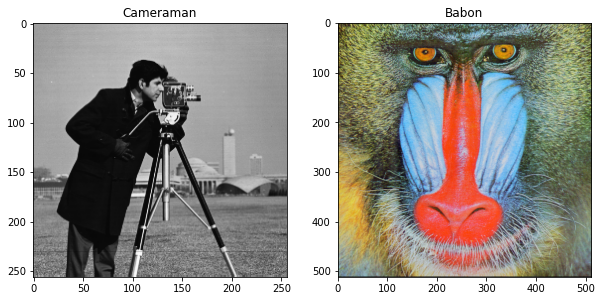

In [2]:
babon = cv2.imread("../images/mandril.tiff")
cameraman = cv2.imread("../images/cameraman.tif")

# Convert BGR order to RGB
babon = cv2.cvtColor(babon, cv2.COLOR_BGR2RGB)
cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2RGB)

f, subplt = plt.subplots(1,2,figsize=(10,5))
subplt[0].imshow(cameraman)
subplt[0].set_title("Cameraman")
subplt[1].imshow(babon)
subplt[1].set_title("Babon")

## Define Log Transformation

In [3]:
def log_transform(image):
    # Map image from 0-1 to 0-255
    image = image * 255
    # Calculate C constant
    c = 255 / np.log(1 + 255)
    # Transform image
    return (c * np.log(image + 1))

## Define Reverse Log Transformation

In [4]:
def exp_transform(image):
    # Calculate C constant
    c = 255 / np.log(1 + 255)
    # Transform image and change array type
    return (np.exp(image / c) - 1).astype('uint8')

## Make Salt and Pepper Noise and Gaussian Noise

Apply salt-and-pepper and gaussian noise to the images then transform the image with log 

Text(0.5, 1.0, 'Babon with Gaussian Noise')

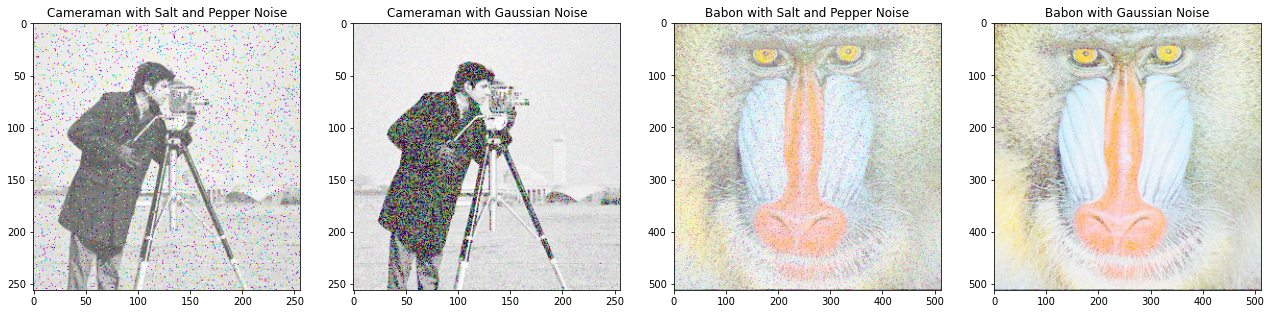

In [5]:
sp_noised_cameraman = log_transform(random_noise(cameraman, mode='s&p'))
gaussian_noised_cameraman = log_transform(random_noise(cameraman, mode='gaussian'))

sp_noised_babon = log_transform(random_noise(babon, mode='s&p'))
gaussian_noised_babon = log_transform(random_noise(babon, mode='gaussian'))

f, subplt = plt.subplots(1,4,figsize=(22,5))
subplt[0].imshow(sp_noised_cameraman.astype('uint8'))
subplt[0].set_title("Cameraman with Salt and Pepper Noise")
subplt[1].imshow(gaussian_noised_cameraman.astype('uint8'))
subplt[1].set_title("Cameraman with Gaussian Noise")
subplt[2].imshow(sp_noised_babon.astype('uint8'))
subplt[2].set_title("Babon with Salt and Pepper Noise")
subplt[3].imshow(gaussian_noised_babon.astype('uint8'))
subplt[3].set_title("Babon with Gaussian Noise")

The Cameraman images show noise filter better then Babon image, Babon contains larger range of the color than Cameraman

## Apply Mean Filter to Salt and Pepper Noisy Image

Apply mean filter to salt and pepper noisy image and then transform the result with resverse log

to apply mean filter we can use blur function in OpenCV

Text(0.5, 1.0, 'Babon Salt and Pepper With Mean 5x5')

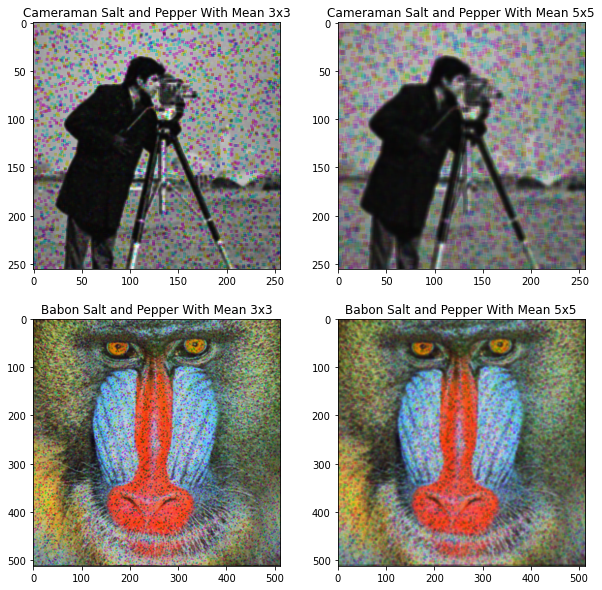

In [6]:
sp_noised_cameraman_mean_filer_3 = exp_transform(cv2.blur(sp_noised_cameraman, (3, 3)))
sp_noised_cameraman_mean_filer_5 = exp_transform(cv2.blur(sp_noised_cameraman, (5, 5)))

sp_noised_babon_mean_filer_3 = exp_transform(cv2.blur(sp_noised_babon, (3, 3)))
sp_noised_babon_mean_filer_5 = exp_transform(cv2.blur(sp_noised_babon, (5, 5)))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(sp_noised_cameraman_mean_filer_3)
sub_plt[0][0].set_title("Cameraman Salt and Pepper With Mean 3x3")
sub_plt[0][1].imshow(sp_noised_cameraman_mean_filer_5)
sub_plt[0][1].set_title("Cameraman Salt and Pepper With Mean 5x5")
sub_plt[1][0].imshow(sp_noised_babon_mean_filer_3)
sub_plt[1][0].set_title("Babon Salt and Pepper With Mean 3x3")
sub_plt[1][1].imshow(sp_noised_babon_mean_filer_5)
sub_plt[1][1].set_title("Babon Salt and Pepper With Mean 5x5")

As result, the mean filter reduce the noise by blurring them and by losing the edges and by increase the size of the filter it works better

by applying mean filter the image blured and by increase the size of the filter the blur increased

## Apply Mean Filter to Gaussian Noisy Image

Apply mean filter to gaussian noisy image and then transform the result with resverse log

to apply mean filter we can use blur function in OpenCV

Text(0.5, 1.0, 'Babon Gaussian With Mean 5x5')

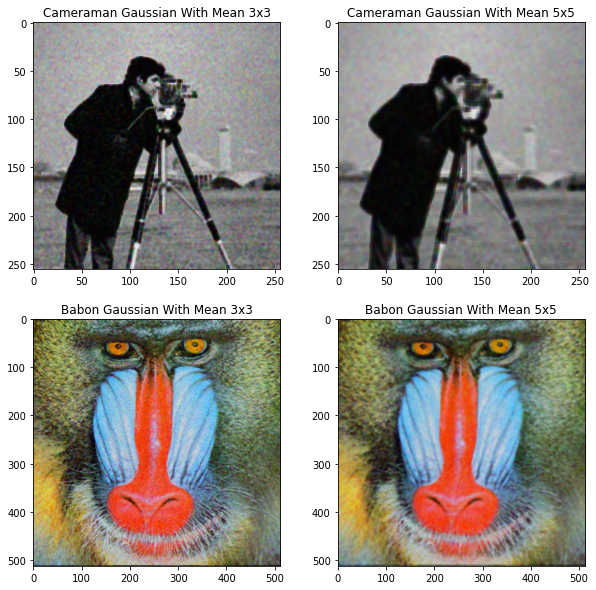

In [7]:
gaussian_noised_cameraman_mean_filer_3 = exp_transform(cv2.blur(gaussian_noised_cameraman, (3, 3)))
gaussian_noised_cameraman_mean_filer_5 = exp_transform(cv2.blur(gaussian_noised_cameraman, (5, 5)))

gaussian_noised_babon_mean_filer_3 = exp_transform(cv2.blur(gaussian_noised_babon, (3, 3)))
gaussian_noised_babon_mean_filer_5 = exp_transform(cv2.blur(gaussian_noised_babon, (5, 5)))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(gaussian_noised_cameraman_mean_filer_3)
sub_plt[0][0].set_title("Cameraman Gaussian With Mean 3x3")
sub_plt[0][1].imshow(gaussian_noised_cameraman_mean_filer_5)
sub_plt[0][1].set_title("Cameraman Gaussian With Mean 5x5")
sub_plt[1][0].imshow(gaussian_noised_babon_mean_filer_3)
sub_plt[1][0].set_title("Babon Gaussian With Mean 3x3")
sub_plt[1][1].imshow(gaussian_noised_babon_mean_filer_5)
sub_plt[1][1].set_title("Babon Gaussian With Mean 5x5")

As result, the mean filter reduce the noise by blurring them and by losing the edges and by increase the size of the filter it works better

by applying mean filter the image blured and by increase the size of the filter the blur increased

## Apply Median Filter to Salt and Pepper Noisy Image

Apply median filter to salt and pepper noisy image and then transform the result with resverse log

to apply mean filter we can use medianBlur function in OpenCV

Text(0.5, 1.0, 'Babon Salt and Pepper With Meidan 5x5')

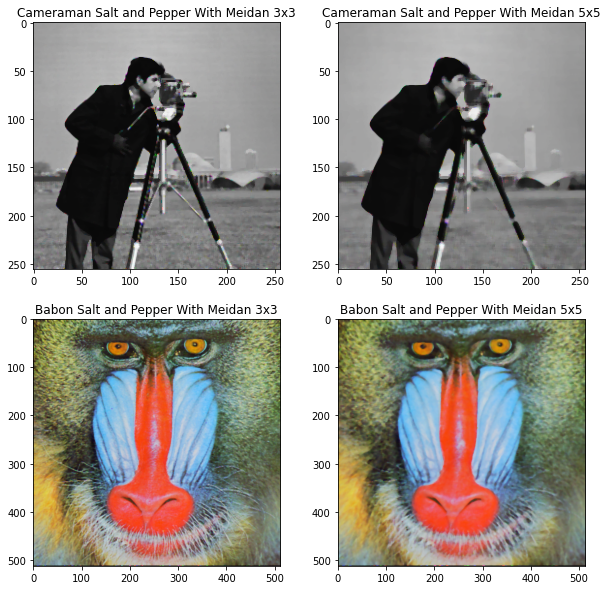

In [8]:
sp_noised_cameraman_median_filer_3 = exp_transform(cv2.medianBlur(sp_noised_cameraman.astype('float32'), 3))
sp_noised_cameraman_median_filer_5 = exp_transform(cv2.medianBlur(sp_noised_cameraman.astype('float32'), 5))

sp_noised_babon_median_filer_3 = exp_transform(cv2.medianBlur(sp_noised_babon.astype('float32'), 3))
sp_noised_babon_median_filer_5 = exp_transform(cv2.medianBlur(sp_noised_babon.astype('float32'), 5))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(sp_noised_cameraman_median_filer_3)
sub_plt[0][0].set_title("Cameraman Salt and Pepper With Meidan 3x3")
sub_plt[0][1].imshow(sp_noised_cameraman_median_filer_5)
sub_plt[0][1].set_title("Cameraman Salt and Pepper With Meidan 5x5")
sub_plt[1][0].imshow(sp_noised_babon_median_filer_3)
sub_plt[1][0].set_title("Babon Salt and Pepper With Meidan 3x3")
sub_plt[1][1].imshow(sp_noised_babon_median_filer_5)
sub_plt[1][1].set_title("Babon Salt and Pepper With Meidan 5x5")

As result, the median filter reduce the noise by blurring them and keeping the edges and by increase the size of the filter it works better

by applying median filter the image blured and by increase the size of the filter the blur increased

the median filter have better result versus mean filter

## Apply Median Filter to Gaussian Noisy Image

Apply median filter to gaussian noisy image and then transform the result with resverse log

to apply mean filter we can use medianBlur function in OpenCV

Text(0.5, 1.0, 'Babon Gaussian With Meidan 5x5')

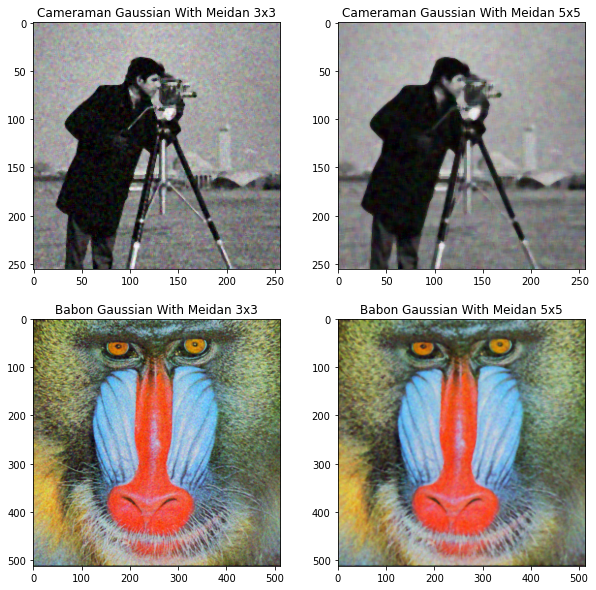

In [9]:
gaussian_noised_cameraman_median_filer_3 = exp_transform(cv2.medianBlur(gaussian_noised_cameraman.astype('float32'), 3))
gaussian_noised_cameraman_median_filer_5 = exp_transform(cv2.medianBlur(gaussian_noised_cameraman.astype('float32'), 5))

gaussian_noised_babon_median_filer_3 = exp_transform(cv2.medianBlur(gaussian_noised_babon.astype('float32'), 3))
gaussian_noised_babon_median_filer_5 = exp_transform(cv2.medianBlur(gaussian_noised_babon.astype('float32'), 5))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(gaussian_noised_cameraman_median_filer_3)
sub_plt[0][0].set_title("Cameraman Gaussian With Meidan 3x3")
sub_plt[0][1].imshow(gaussian_noised_cameraman_median_filer_5)
sub_plt[0][1].set_title("Cameraman Gaussian With Meidan 5x5")
sub_plt[1][0].imshow(gaussian_noised_babon_median_filer_3)
sub_plt[1][0].set_title("Babon Gaussian With Meidan 3x3")
sub_plt[1][1].imshow(gaussian_noised_babon_median_filer_5)
sub_plt[1][1].set_title("Babon Gaussian With Meidan 5x5")

As result, the median filter reduce the noise by blurring them and keeping the edges and by increase the size of the filter it works better

by applying median filter the image blured and by increase the size of the filter the blur increased

the median filter have better result versus mean filter

## Apply Gaussian Filter to Salt and Pepper Noisy Image

Apply gaussian filter to salt and pepper noisy image and then transform the result with resverse log

to apply mean filter we can use GaussianBlur function in OpenCV

Text(0.5, 1.0, 'Babon Salt and Pepper With Gaussian 5x5')

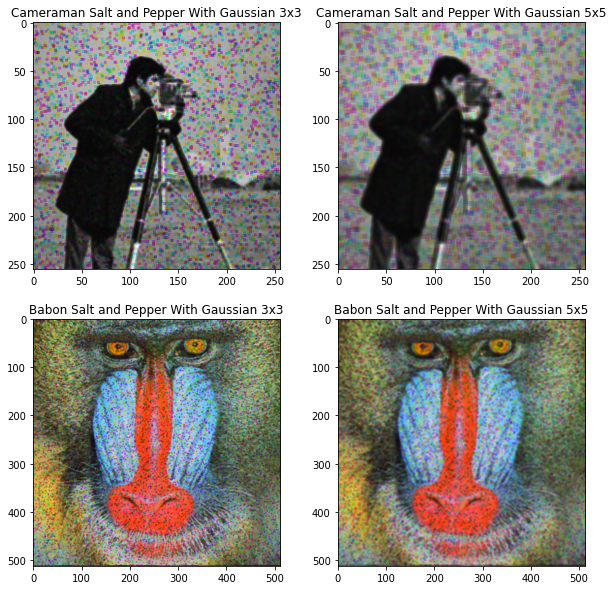

In [10]:
sp_noised_cameraman_gaussian_filer_3 = exp_transform(cv2.GaussianBlur(sp_noised_cameraman, (3, 3), cv2.BORDER_DEFAULT))
sp_noised_cameraman_gaussian_filer_5 = exp_transform(cv2.GaussianBlur(sp_noised_cameraman, (5, 5), cv2.BORDER_DEFAULT))

sp_noised_babon_gaussian_filer_3 = exp_transform(cv2.GaussianBlur(sp_noised_babon, (3, 3), cv2.BORDER_DEFAULT))
sp_noised_babon_gaussian_filer_5 = exp_transform(cv2.GaussianBlur(sp_noised_babon, (5, 5), cv2.BORDER_DEFAULT))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(sp_noised_cameraman_gaussian_filer_3)
sub_plt[0][0].set_title("Cameraman Salt and Pepper With Gaussian 3x3")
sub_plt[0][1].imshow(sp_noised_cameraman_gaussian_filer_5)
sub_plt[0][1].set_title("Cameraman Salt and Pepper With Gaussian 5x5")
sub_plt[1][0].imshow(sp_noised_babon_gaussian_filer_3)
sub_plt[1][0].set_title("Babon Salt and Pepper With Gaussian 3x3")
sub_plt[1][1].imshow(sp_noised_babon_gaussian_filer_5)
sub_plt[1][1].set_title("Babon Salt and Pepper With Gaussian 5x5")

As result, the gaussian filter reduce the noise by blurring them and keeping the edges and by increase the size of the filter it works better

by applying gaussian filter the image blured and by increase the size of the filter the blur increased

the gaussian filter keep edges better than mean and median filter

## Apply Gaussian Filter to Noisy Image

Apply gaussian filter to gaussian noisy image and then transform the result with resverse log

to apply mean filter we can use GaussianBlur function in OpenCV

Text(0.5, 1.0, 'Babon Gaussian With Gaussian 5x5')

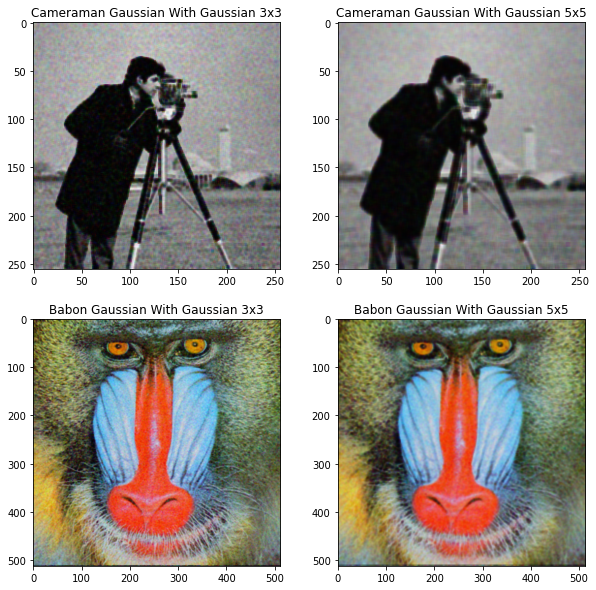

In [11]:
gaussian_noised_cameraman_gaussian_filer_3 = exp_transform(cv2.GaussianBlur(gaussian_noised_cameraman, (3, 3), cv2.BORDER_DEFAULT))
gaussian_noised_cameraman_gaussian_filer_5 = exp_transform(cv2.GaussianBlur(gaussian_noised_cameraman, (5, 5), cv2.BORDER_DEFAULT))


gaussian_noised_babon_gaussian_filer_3 = exp_transform(cv2.GaussianBlur(gaussian_noised_babon, (3, 3), cv2.BORDER_DEFAULT))
gaussian_noised_babon_gaussian_filer_5 = exp_transform(cv2.GaussianBlur(gaussian_noised_babon, (5, 5), cv2.BORDER_DEFAULT))

f, sub_plt = plt.subplots(2, 2, figsize=(10, 10))
sub_plt[0][0].imshow(gaussian_noised_cameraman_gaussian_filer_3)
sub_plt[0][0].set_title("Cameraman Gaussian With Gaussian 3x3")
sub_plt[0][1].imshow(gaussian_noised_cameraman_gaussian_filer_5)
sub_plt[0][1].set_title("Cameraman Gaussian With Gaussian 5x5")
sub_plt[1][0].imshow(gaussian_noised_babon_gaussian_filer_3)
sub_plt[1][0].set_title("Babon Gaussian With Gaussian 3x3")
sub_plt[1][1].imshow(gaussian_noised_babon_gaussian_filer_5)
sub_plt[1][1].set_title("Babon Gaussian With Gaussian 5x5")

As result, the gaussian filter reduce the noise by blurring them and keeping the edges and by increase the size of the filter it works better

by applying gaussian filter the image blured and by increase the size of the filter the blur increased

the gaussian filter keep edges better than mean and median filter

## Final Result

Text(0.5, 1.0, 'Babon Guassian With Mean 5x5')

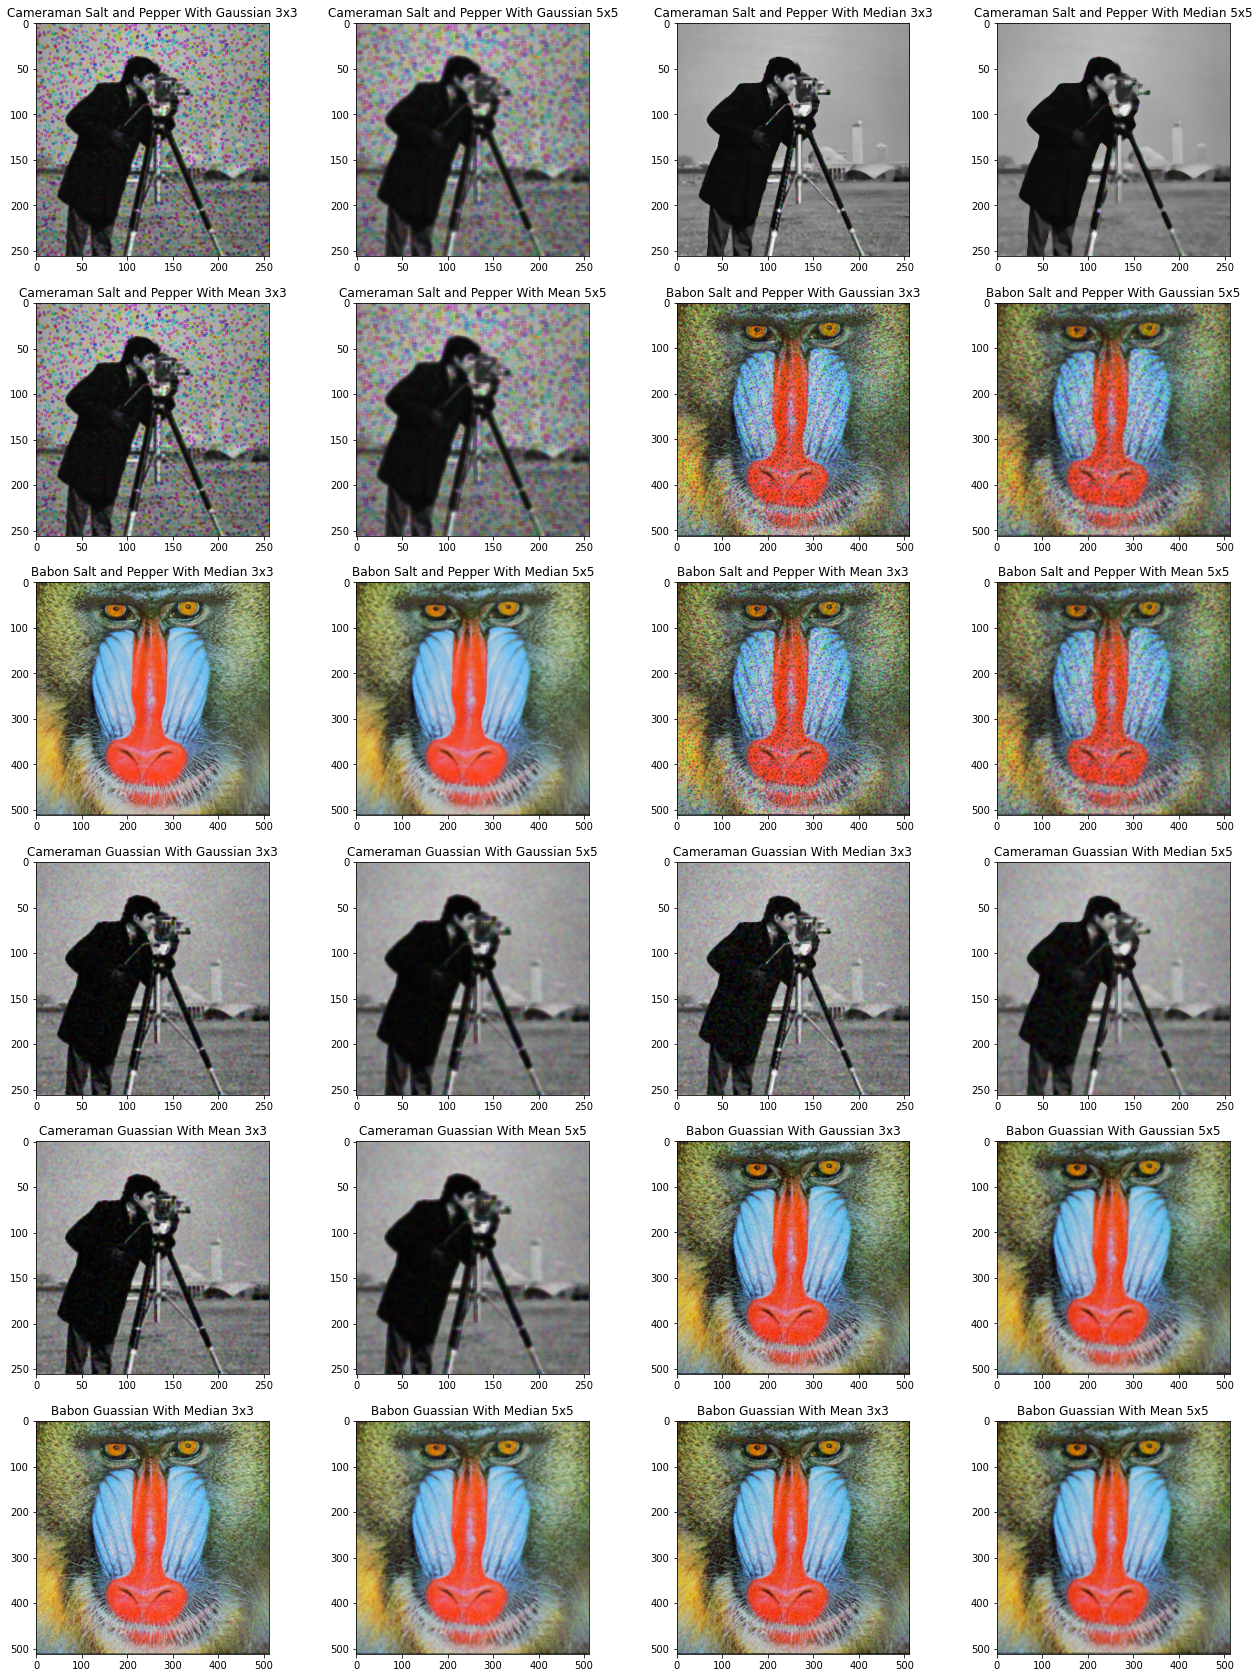

In [12]:
f, sub_plt = plt.subplots(6, 4, figsize=(22, 30))
sub_plt[0][0].imshow(sp_noised_cameraman_gaussian_filer_3)
sub_plt[0][0].set_title("Cameraman Salt and Pepper With Gaussian 3x3")
sub_plt[0][1].imshow(sp_noised_cameraman_gaussian_filer_5)
sub_plt[0][1].set_title("Cameraman Salt and Pepper With Gaussian 5x5")
sub_plt[0][2].imshow(sp_noised_cameraman_median_filer_3)
sub_plt[0][2].set_title("Cameraman Salt and Pepper With Median 3x3")
sub_plt[0][3].imshow(sp_noised_cameraman_median_filer_5)
sub_plt[0][3].set_title("Cameraman Salt and Pepper With Median 5x5")
sub_plt[1][0].imshow(sp_noised_cameraman_mean_filer_3)
sub_plt[1][0].set_title("Cameraman Salt and Pepper With Mean 3x3")
sub_plt[1][1].imshow(sp_noised_cameraman_mean_filer_5)
sub_plt[1][1].set_title("Cameraman Salt and Pepper With Mean 5x5")
sub_plt[1][2].imshow(sp_noised_babon_gaussian_filer_3)
sub_plt[1][2].set_title("Babon Salt and Pepper With Gaussian 3x3")
sub_plt[1][3].imshow(sp_noised_babon_gaussian_filer_5)
sub_plt[1][3].set_title("Babon Salt and Pepper With Gaussian 5x5")
sub_plt[2][0].imshow(sp_noised_babon_median_filer_3)
sub_plt[2][0].set_title("Babon Salt and Pepper With Median 3x3")
sub_plt[2][1].imshow(sp_noised_babon_median_filer_5)
sub_plt[2][1].set_title("Babon Salt and Pepper With Median 5x5")
sub_plt[2][2].imshow(sp_noised_babon_mean_filer_3)
sub_plt[2][2].set_title("Babon Salt and Pepper With Mean 3x3")
sub_plt[2][3].imshow(sp_noised_babon_mean_filer_5)
sub_plt[2][3].set_title("Babon Salt and Pepper With Mean 5x5")
sub_plt[3][0].imshow(gaussian_noised_cameraman_gaussian_filer_3)
sub_plt[3][0].set_title("Cameraman Guassian With Gaussian 3x3")
sub_plt[3][1].imshow(gaussian_noised_cameraman_gaussian_filer_5)
sub_plt[3][1].set_title("Cameraman Guassian With Gaussian 5x5")
sub_plt[3][2].imshow(gaussian_noised_cameraman_median_filer_3)
sub_plt[3][2].set_title("Cameraman Guassian With Median 3x3")
sub_plt[3][3].imshow(gaussian_noised_cameraman_median_filer_5)
sub_plt[3][3].set_title("Cameraman Guassian With Median 5x5")
sub_plt[4][0].imshow(gaussian_noised_cameraman_mean_filer_3)
sub_plt[4][0].set_title("Cameraman Guassian With Mean 3x3")
sub_plt[4][1].imshow(gaussian_noised_cameraman_mean_filer_5)
sub_plt[4][1].set_title("Cameraman Guassian With Mean 5x5")
sub_plt[4][2].imshow(gaussian_noised_babon_gaussian_filer_3)
sub_plt[4][2].set_title("Babon Guassian With Gaussian 3x3")
sub_plt[4][3].imshow(gaussian_noised_babon_gaussian_filer_5)
sub_plt[4][3].set_title("Babon Guassian With Gaussian 5x5")
sub_plt[5][0].imshow(gaussian_noised_babon_median_filer_3)
sub_plt[5][0].set_title("Babon Guassian With Median 3x3")
sub_plt[5][1].imshow(gaussian_noised_babon_median_filer_5)
sub_plt[5][1].set_title("Babon Guassian With Median 5x5")
sub_plt[5][2].imshow(gaussian_noised_babon_mean_filer_3)
sub_plt[5][2].set_title("Babon Guassian With Mean 3x3")
sub_plt[5][3].imshow(gaussian_noised_babon_mean_filer_5)
sub_plt[5][3].set_title("Babon Guassian With Mean 5x5")

As result, the log transform help to reduce the noise